## Module 4 - Lab

Following visual design rules will cetainly help make a data visualization look more appealing and informative. People may be more interetsed to look at it. This notebook tries to summarize few of the visual rules of Edward Tufte. 

As mentioned in the **[PDF](http://localhost:8888/files/modules/module4/labs/L4_DataViz_Principles.pdf)** TUfte is a minimalist and following rules when visualizing data.

* Express complex ideas while communicating with clarity, precision, and efficiency.
* Give the viewer the greatest number of ideas in the shortest time with least ink in the smallest space.
* Represented numbers measured on the graphic should be proportional to the numerical quantities represented.
* Clear, detailed, thorough labeling.
* Show data variation, not design variation.

In [69]:
library(dplyr)

In [74]:
life_expectancy=read.csv("../../../datasets/life_expectancy/life_expectancy.csv",sep=",",header=T)
life_expectancy <- select(life_expectancy, -X2015,-X2016)
names(life_expectancy) <- gsub("X", "", names(life_expectancy), fixed = TRUE)
head(life_expectancy)

,Country.Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Aruba,65.56936585,65.98802439,66.36553659,66.71397561,67.04429268,67.3697561,67.699,68.03468293,68.37714634,...,74.22807317,74.37619512,74.5267561,74.67573171,74.81814634,74.95353659,75.08139024,75.2057561,75.32865854,75.45109756
2,Andorra,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Afghanistan,32.3285122,32.77743902,33.21990244,33.65787805,34.09287805,34.52539024,34.95741463,35.38941463,35.82241463,...,57.0272439,57.43256098,57.83382927,58.22502439,58.60368293,58.97082927,59.32795122,59.67960976,60.02826829,60.37446341
4,Angola,32.98482927,33.38621951,33.78758537,34.18846341,34.59034146,34.99221951,35.39509756,35.79997561,36.20585366,...,48.53880488,49.00704878,49.43573171,49.84739024,50.25102439,50.65417073,51.05931707,51.464,51.86617073,52.26687805
5,Albania,62.25436585,63.27346341,64.16285366,64.88709756,65.43819512,65.82739024,66.08931707,66.28721951,66.47495122,...,76.08160976,76.28612195,76.47029268,76.65207317,76.84036585,77.03695122,77.24058537,77.44397561,77.64046341,77.83046341
6,Arab World,46.8500222,47.43012699,48.0086029,48.58976532,49.17435247,49.75762312,50.32999302,50.88569671,51.42429986,...,68.75352097,68.98318856,69.20700823,69.41718278,69.61892949,69.8130248,69.99300952,70.17366957,70.36980568,70.56790191


In [75]:
target <- c("Serbia", "Russian Federation")
df <- filter(life_expectancy, Country.Name %in% target)
head(df)

,Country.Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Russian Federation,66.05529268,66.59702439,67.02141463,67.33990244,67.5665122,67.71885366,67.8125122,67.86014634,67.87434146,...,65.47,66.64317073,67.49756098,67.84878049,68.60487805,68.85609756,69.65853659,70.36585366,70.36585366,70.36585366
2,Serbia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,72.83414634,73.38536585,73.63170732,73.88536585,73.98536585,74.33658537,74.53658537,74.83658537,75.18536585,75.53414634


In [76]:
library(reshape2)
df <- melt(df)  #the function melt reshapes it from wide to long
head(df)

# df <- df %>% mutate(value = as.numeric(value)) 
# df$value = round(df$value)

Using Country.Name as id variables


,Country.Name,variable,value
1,Russian Federation,1960,66.05529268
2,Serbia,1960,NA
3,Russian Federation,1961,66.59702439
4,Serbia,1961,NA
5,Russian Federation,1962,67.02141463
6,Serbia,1962,NA


### Let the data speak

Warning message:
"Removed 38 rows containing missing values (geom_point)."Warning message:
"Removed 31 rows containing missing values (geom_path)."

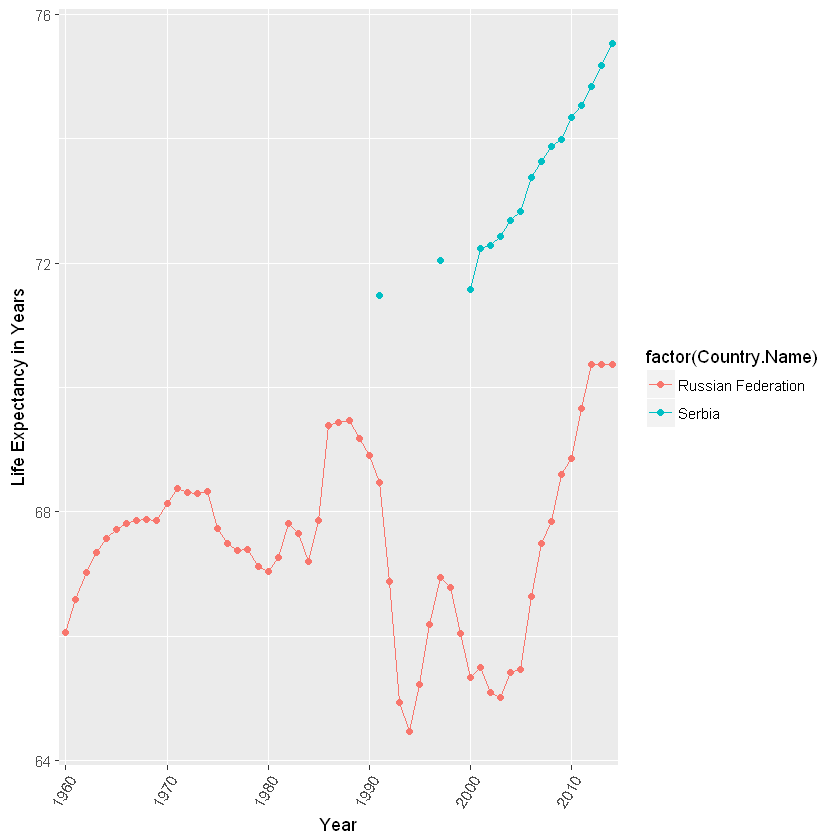

In [77]:
library(ggplot2)
ggplot(df, aes(variable, value, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + 
    geom_line(aes(color=factor(Country.Name)))+ 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) + ylab("Life Expectancy in Years") + xlab("Year")

First thumb rule is to let the data speak. 

Try to remove outliers and fill in missing data gaps before plotting the data. Sometimes it's best just to display the data and let human reasoning take care of those details. For example in above plot, life expectancy data for two countries, Serbia and Russian Federation. Russian Federation has data for all the years from 1960 to 2014 and Serbia is missing a lot of data. It has a lot of gaps until the year 2000. Simulated data can be filled in place of NA's or lines could be drawn between the points. 

It's better to just let human reasoning fill these in with what is expected to be between these data points.

### Describing Maps with Annotations

In [123]:
target <- c("India", "Pakistan")
df <- filter(life_expectancy, Country.Name %in% target)

df <- melt(df)  #the function melt reshapes it from wide to long
head(df)

Using Country.Name as id variables


,Country.Name,variable,value
1,India,1960,41.17195122
2,Pakistan,1960,45.29046341
3,India,1961,41.7904878
4,Pakistan,1961,46.22321951
5,India,1962,42.41741463
6,Pakistan,1962,47.11697561


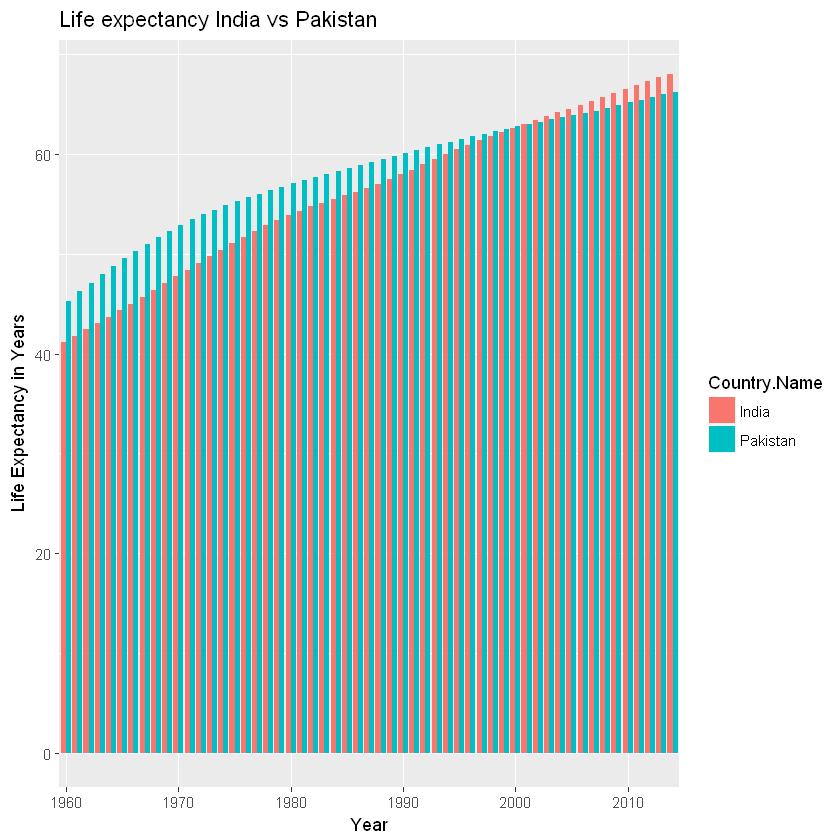

In [140]:
require(ggplot2)

ggplot(df, aes(x=variable, y=value, fill=Country.Name)) + 
  geom_bar(position='dodge', stat='identity') + scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + 
    ylab("Life Expectancy in Years") + xlab("Year") +
    labs(title="Life expectancy India vs Pakistan")

## Lie Factor

Consider the plot below with no axes labels on x and y axis. Y-axis ranges from 40 to 70. The plot is misleading without the axis labels. It implies India is doing a lot better than Pakistan in terms of increase in life expectancy. But when below plot is compared with above plot india's life expectancy is slightly better than pakistan grdually increasing from 2000. 

As mentioned in the lab pdf notes, numbers assumed are are not proportional to the numerical graphic represented.

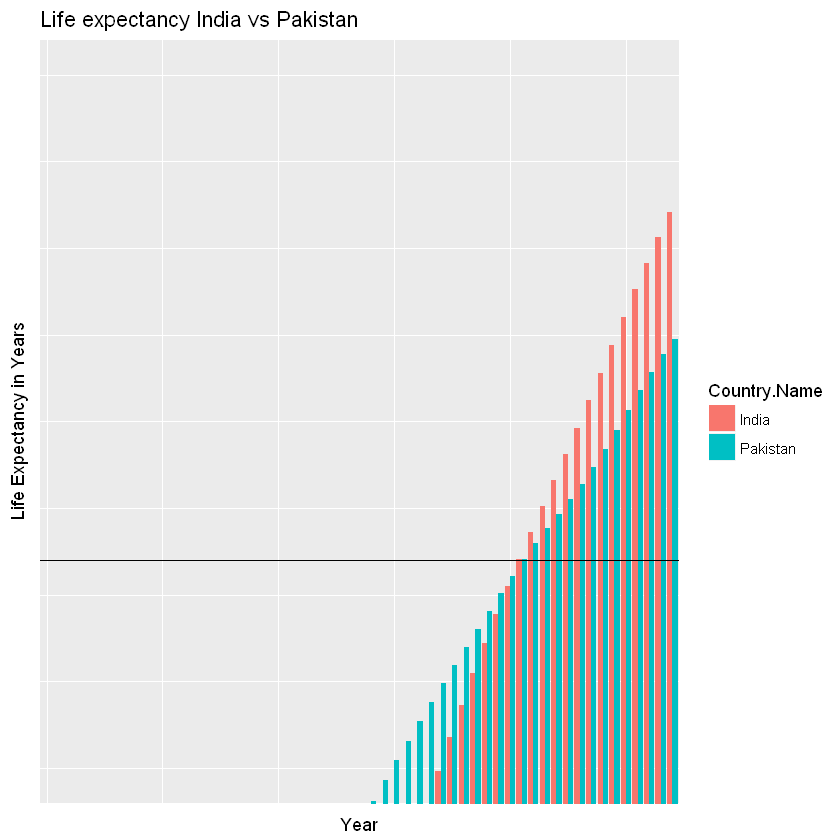

In [149]:
ggplot(df, aes(x=variable, y=value, fill=Country.Name)) + 
  geom_bar(position='dodge', stat='identity') + scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + 
    coord_cartesian(ylim=c(60,70)) + geom_hline(aes(yintercept=63)) + ylab("Life Expectancy in Years") + xlab("Year") +
    labs(title="Life expectancy India vs Pakistan") + 
    theme(axis.text.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.ticks.y=element_blank())

Even though Tufte suggests to use as much less detail as possible, plots should have words on it to explain the visual elements. Axes should be labelled. Labels should be annotated to make sure that the reader understands what's being plotted and also understand the semantics behind the graph. The horizontal bar at age 63 represents the age where both countries have same life expectancy. Annotations have the relationship between the words and the geometry and often gets the job done in a visualization. 

## Chart Junk

In the process of making a visualization look prettier, lots of elements are generally added to a visualization. These elements detract from the actual message that the visualization is trying to provide to the observer. 

A three-dimensional graph looks nicer than a two dimensional graph. But its better to avoid 3d plots as it makes it difficult to interpret some additional things plotted onn top of this 3d elements. Also it's better to avoid adding a lot of extraneous details to a chart that may make it look more engaging but could detract from its real message. A nice quantitative measure of chart junk is the data-ink ratio. The data-ink ratio basically states that how much data are you displaying in your visualization divided by how much ink are you using in the visualization. 

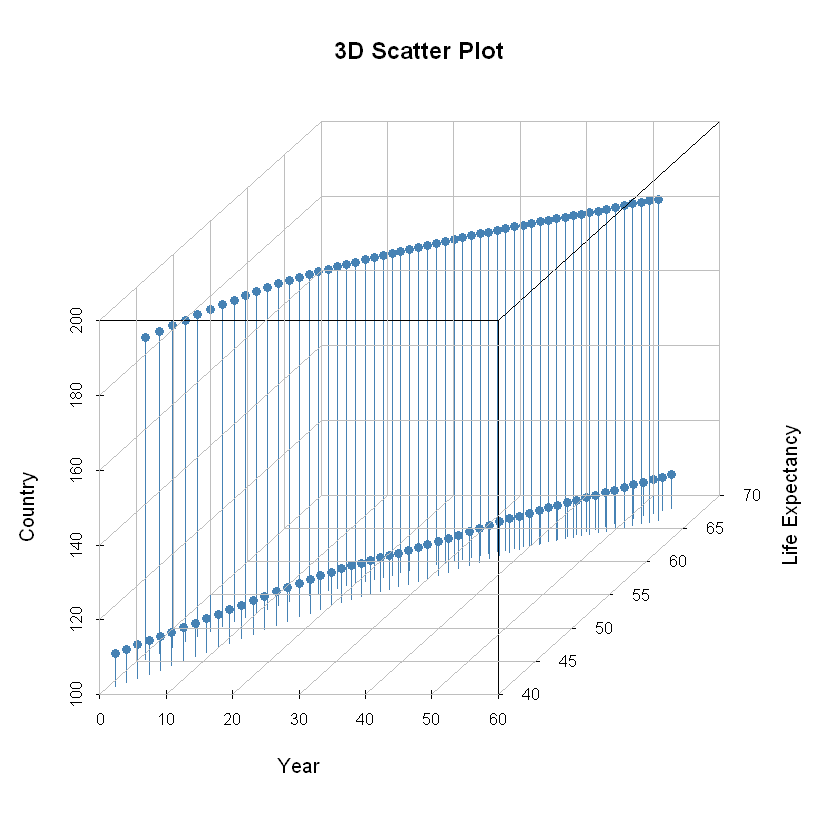

In [184]:
# install.packages("scatterplot3d",repo="https://cran.cnr.berkeley.edu/")

source('../grid.r')

library("scatterplot3d")
s3d=scatterplot3d(df$variable,df$value,df$Country.Name, pch=19, color = "steel blue", type="h",
              main="3D Scatter Plot",
              xlab = "Year",
              ylab = "Life Expectancy",
              zlab = "Country")
addgrids3d(as.numeric(df$variable),df$value,as.numeric(df$Country.Name), grid = c("xy", "xz", "yz"))

Above 3d scatter plot is a perfectly good plot displaying life expectancy over years 1960to 2014 for India nd Pakistan. Samething is displayed without the 3d structure, grid lines, vertical projections and with very brief annotations left. Less ink has been used in below and focus is more on the actual data. 

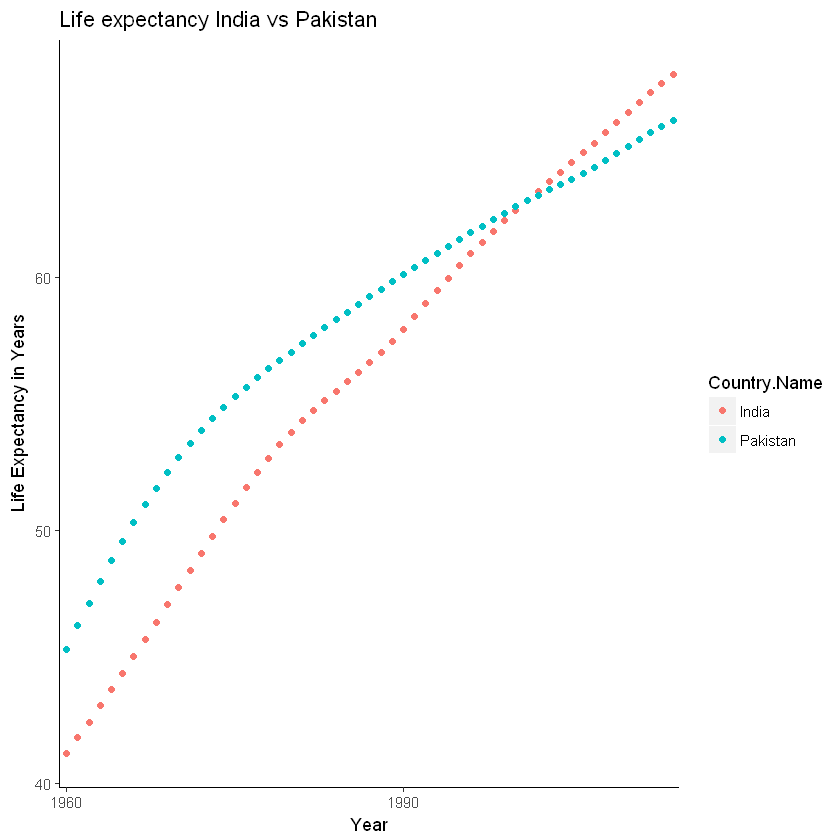

In [189]:
ggplot(df, aes(x=variable,y=value)) + 
    geom_point(aes(color=Country.Name)) +
    scale_x_discrete(breaks=c(seq(1960,2020,by=30))) + 
    scale_y_continuous(breaks=c(seq(40,70,by=10))) + 
    ylab("Life Expectancy in Years") + xlab("Year") +
    labs(title="Life expectancy India vs Pakistan") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black"))

By using different design elements, changing the color etc visual display of information can be organised a little bit better.

### Multiples

Maintain a consistent design and have multiple visualizations using that same consistent design so that the differences can be seen as the data changes. In each case below, almost exact same vertical axis is maintained. Same annotation for the different cases is used and the same horizontal axis. See the difference from graph to graph in addition to the individual changes in the data.

In [205]:
target1 <- c("France", "Germany","Switzerland","United Kingdom")
europe <- filter(life_expectancy, Country.Name %in% target1)

europe <- melt(europe)  

target2 <- c("India", "Japan","China","malaysia")
asia <- filter(life_expectancy, Country.Name %in% target2)

asia <- melt(asia)  

target3 <- c("Sudan", "Central African Republic","South Africa","Nigeria")
africa <- filter(life_expectancy, Country.Name %in% target3)

africa <- melt(africa)  

target4 <- c("Uruguay", "Chile","Venezuela, RB","Brazil")
latin <- filter(life_expectancy, Country.Name %in% target4)

latin <- melt(latin)  

Using Country.Name as id variables
Using Country.Name as id variables
Using Country.Name as id variables
Using Country.Name as id variables


Warning message:
"Removed 19 rows containing missing values (geom_point)."Warning message:
"Removed 19 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_point)."Warning message:
"Removed 5 rows containing missing values (geom_path)."Warning message:
"Removed 35 rows containing missing values (geom_point)."Warning message:
"Removed 35 rows containing missing values (geom_path)."

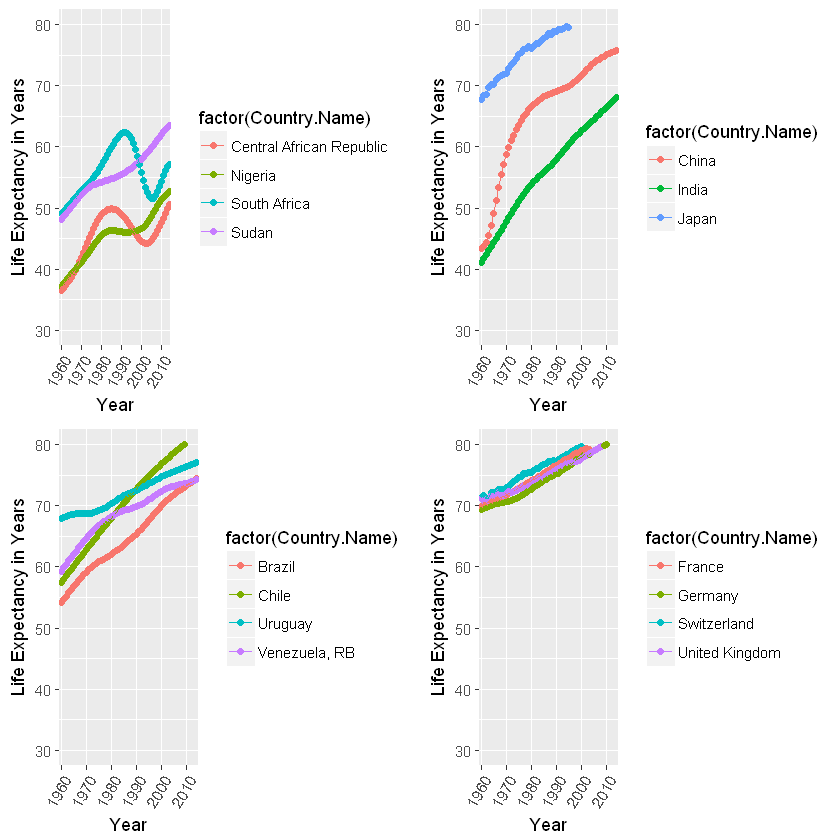

In [210]:
library(gridExtra)

p1 <- ggplot(africa, aes(variable, value, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + ylim(30,80) +
    geom_line(aes(color=factor(Country.Name)))+ 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) + ylab("Life Expectancy in Years") + xlab("Year")

p2 <- ggplot(asia, aes(variable, value, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + ylim(30,80) +
    geom_line(aes(color=factor(Country.Name)))+ 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) + ylab("Life Expectancy in Years") + xlab("Year")

p3 <- ggplot(latin, aes(variable, value, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + ylim(30,80) +
    geom_line(aes(color=factor(Country.Name)))+ 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) + ylab("Life Expectancy in Years") + xlab("Year")

p4 <- ggplot(europe, aes(variable, value, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + ylim(30,80) +
    geom_line(aes(color=factor(Country.Name)))+ 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) + ylab("Life Expectancy in Years") + xlab("Year")

grid.arrange(p1,p2,p3,p4,ncol=2)